# benchmark water_level in remove response

In [7]:
import obspy
from glob import glob
from os.path import join
%matplotlib inline

In [3]:
data=obspy.read("./data/2012.001.05.24.41.4000.HA.JY.00*")

In [4]:
data

3 Trace(s) in Stream:
HA.JY.00.BHE | 2012-01-01T05:24:41.400000Z - 2012-01-01T06:31:21.390000Z | 100.0 Hz, 400000 samples
HA.JY.00.BHN | 2012-01-01T05:24:41.400000Z - 2012-01-01T06:31:21.390000Z | 100.0 Hz, 400000 samples
HA.JY.00.BHZ | 2012-01-01T05:24:41.400000Z - 2012-01-01T06:31:21.390000Z | 100.0 Hz, 400000 samples

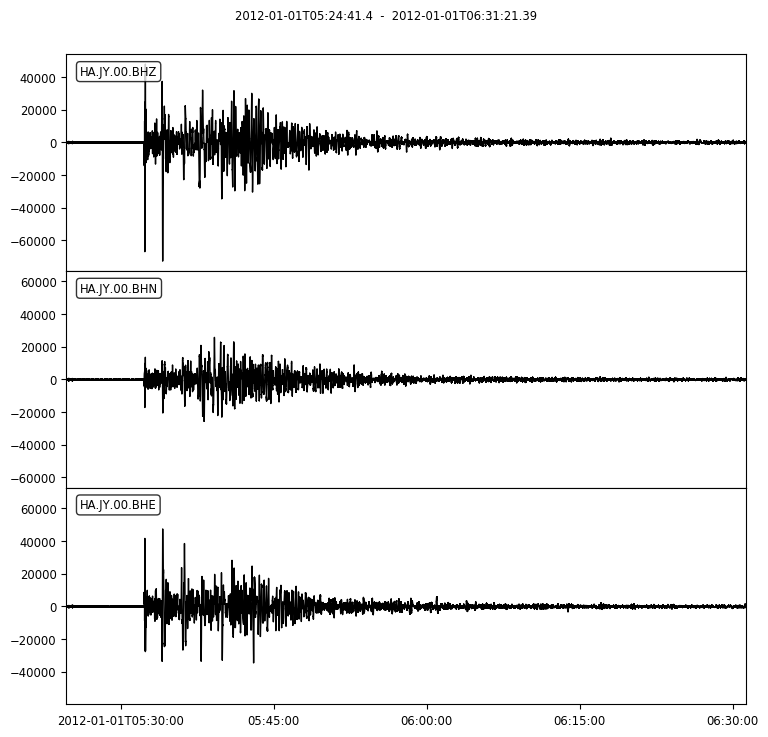

In [6]:
data.plot();

In [8]:
inv=obspy.core.inventory.inventory.Inventory()
all_resps=glob(f"./data/RESP.HA.JY.00*")
for item in all_resps:
    inv+=obspy.read_inventory(item)

In [9]:
inv

Inventory created at 2019-07-26T15:33:45.903180Z
	Created by: ObsPy 1.1.1
		    https://www.obspy.org
	Sending institution: ObsPy 1.1.1,ObsPy's obspy.io.xseed version 1.1.1
	Contains:
		Networks (3):
			HA (3x)
		Stations (3):
			HA.JY () (3x)
		Channels (3):
			HA.JY.00.BHZ, HA.JY.00.BHN, HA.JY.00.BHE

In [10]:
data.detrend("linear")
data.taper(0.05)

3 Trace(s) in Stream:
HA.JY.00.BHE | 2012-01-01T05:24:41.400000Z - 2012-01-01T06:31:21.390000Z | 100.0 Hz, 400000 samples
HA.JY.00.BHN | 2012-01-01T05:24:41.400000Z - 2012-01-01T06:31:21.390000Z | 100.0 Hz, 400000 samples
HA.JY.00.BHZ | 2012-01-01T05:24:41.400000Z - 2012-01-01T06:31:21.390000Z | 100.0 Hz, 400000 samples

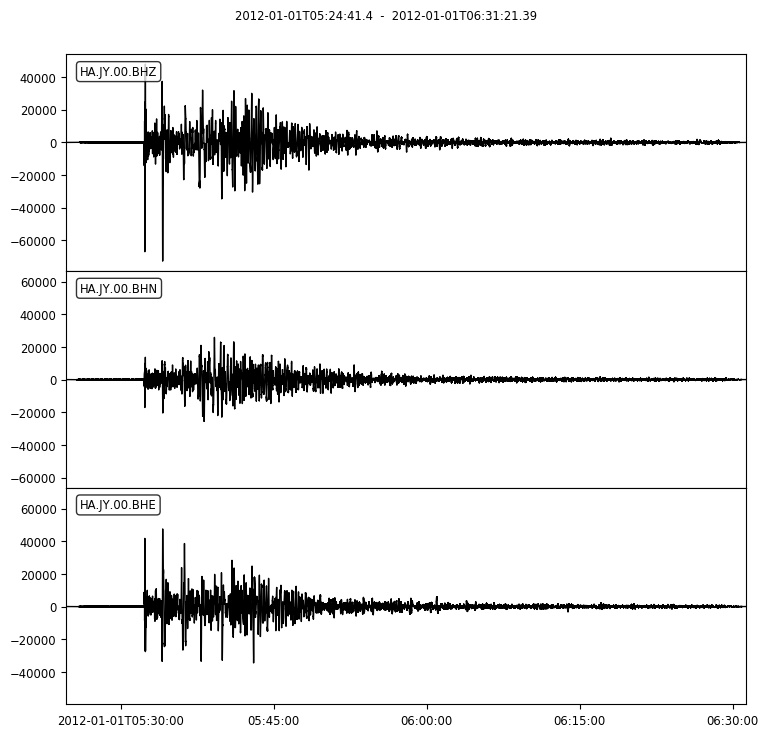

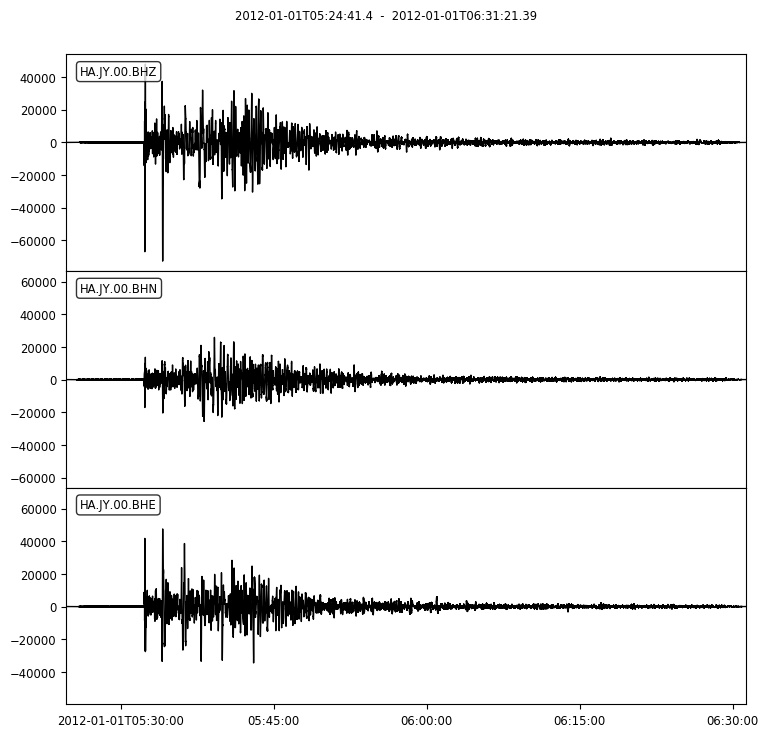

In [11]:
data.plot()

In [12]:
data_raw=data.copy()

# with water level (0.0008 0.001 10 12)

3 Trace(s) in Stream:
HA.JY.00.BHE | 2012-01-01T05:24:41.400000Z - 2012-01-01T06:31:21.390000Z | 100.0 Hz, 400000 samples
HA.JY.00.BHN | 2012-01-01T05:24:41.400000Z - 2012-01-01T06:31:21.390000Z | 100.0 Hz, 400000 samples
HA.JY.00.BHZ | 2012-01-01T05:24:41.400000Z - 2012-01-01T06:31:21.390000Z | 100.0 Hz, 400000 samples

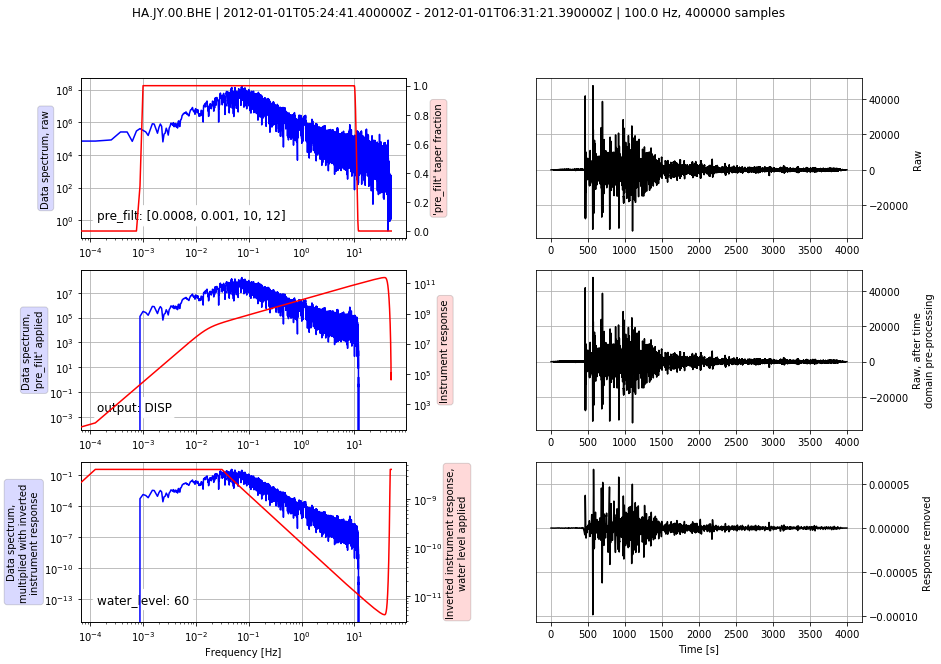

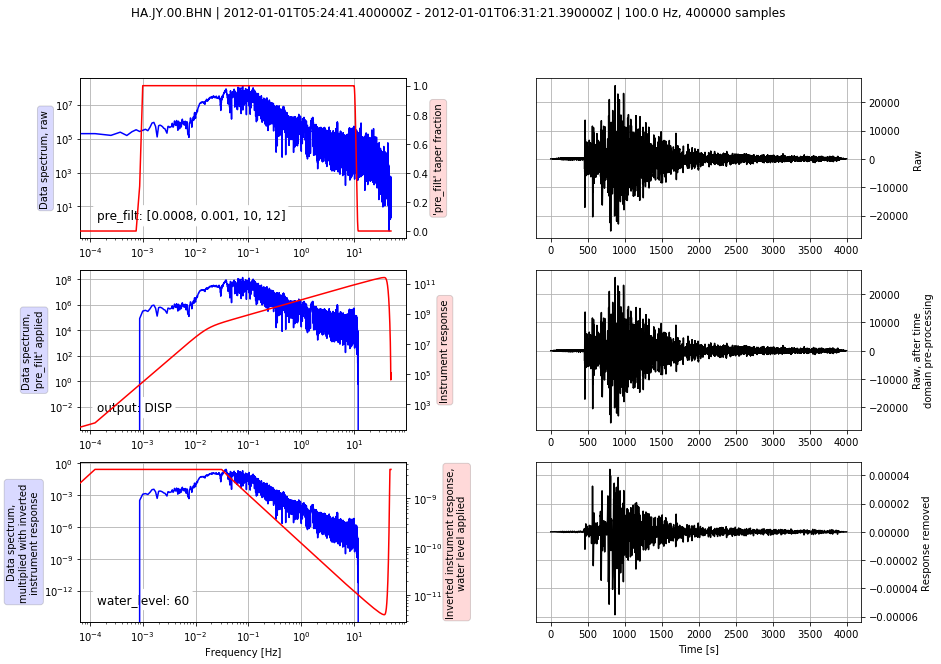

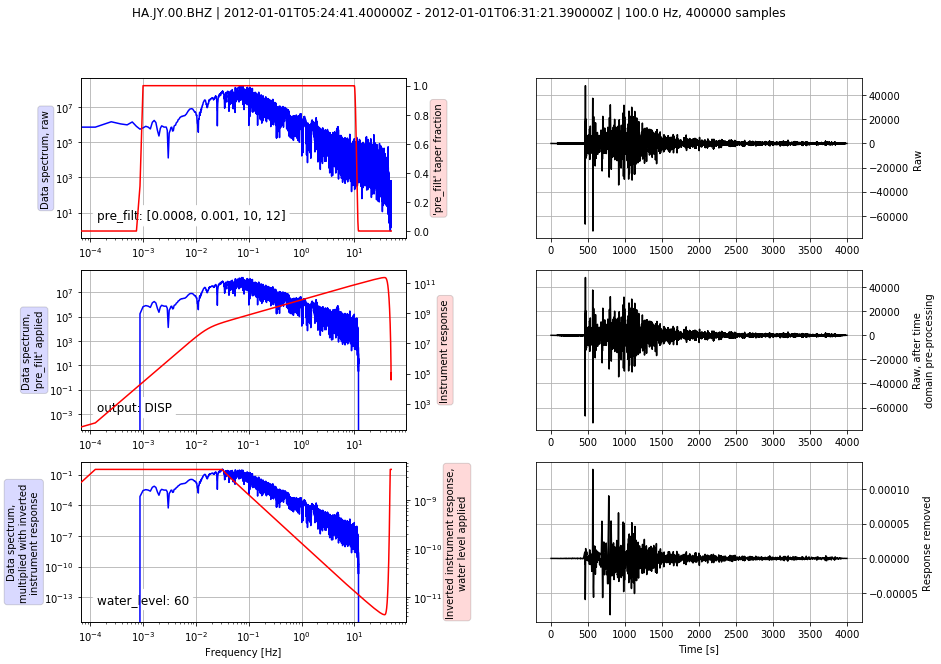

In [13]:
data=data_raw.copy()
pre_filt= (0.0008 ,0.001, 10, 12)
data.remove_response(output="DISP", pre_filt=pre_filt, zero_mean=False,
                               taper=False, inventory=inv,plot=True)

# without water level

3 Trace(s) in Stream:
HA.JY.00.BHE | 2012-01-01T05:24:41.400000Z - 2012-01-01T06:31:21.390000Z | 100.0 Hz, 400000 samples
HA.JY.00.BHN | 2012-01-01T05:24:41.400000Z - 2012-01-01T06:31:21.390000Z | 100.0 Hz, 400000 samples
HA.JY.00.BHZ | 2012-01-01T05:24:41.400000Z - 2012-01-01T06:31:21.390000Z | 100.0 Hz, 400000 samples

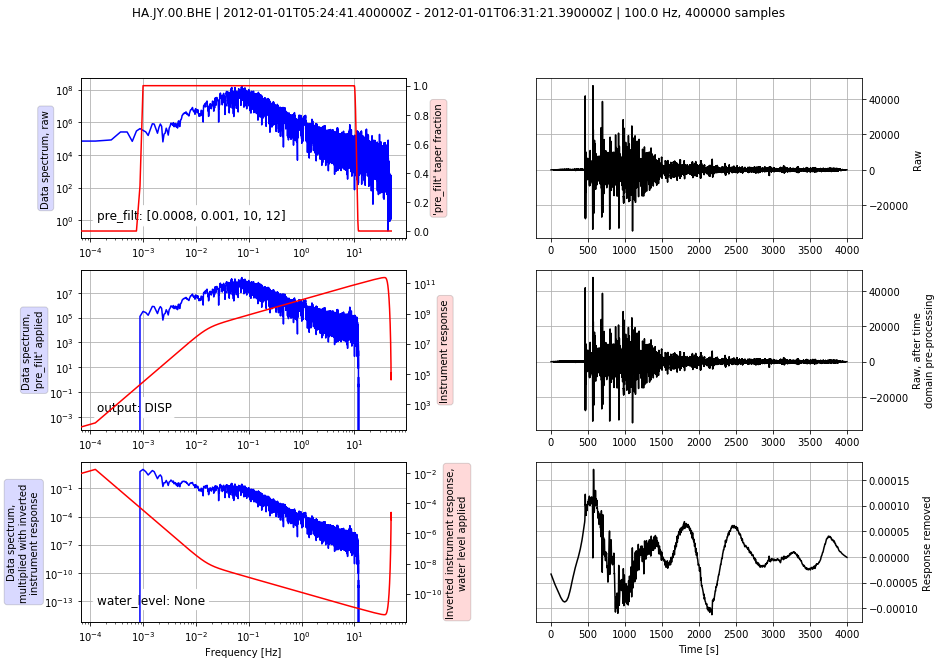

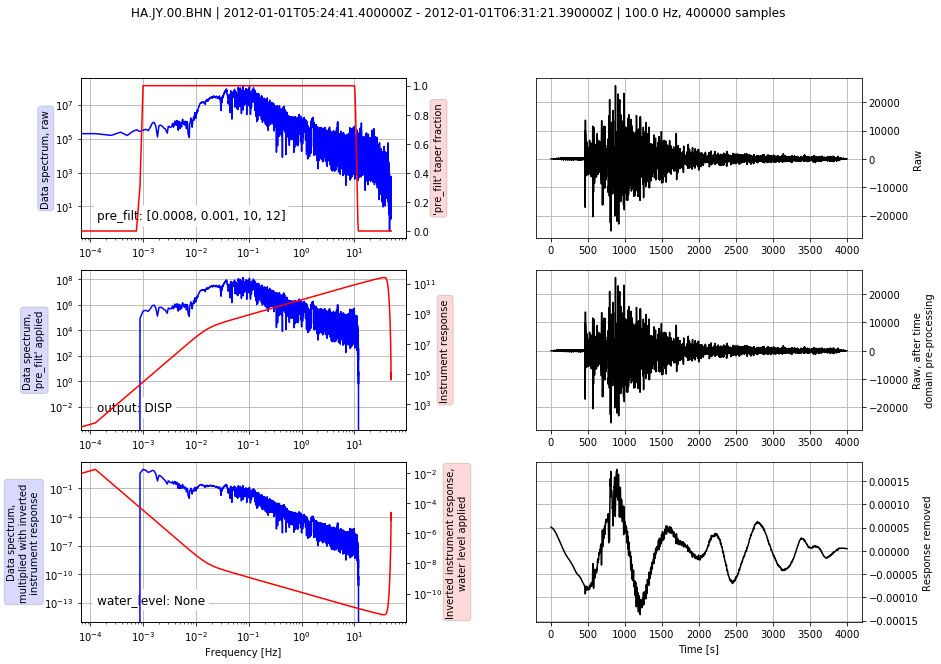

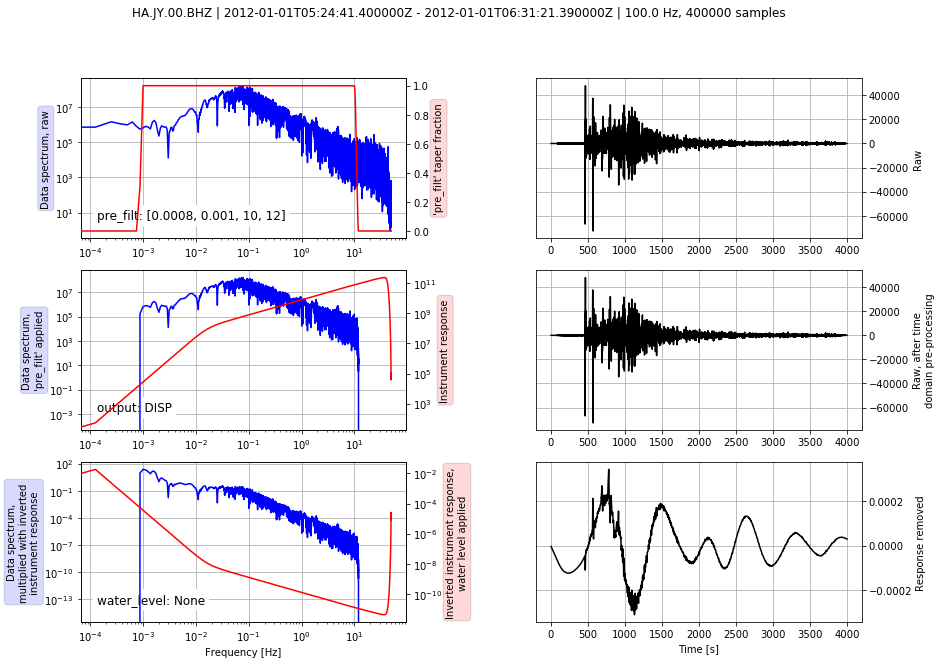

In [14]:
data=data_raw.copy()
pre_filt= (0.0008 ,0.001, 10, 12)
data.remove_response(output="DISP", pre_filt=pre_filt, zero_mean=False,
                               taper=False, inventory=inv,plot=True,water_level=None)

# with smaller prefilt

3 Trace(s) in Stream:
HA.JY.00.BHE | 2012-01-01T05:24:41.400000Z - 2012-01-01T06:31:21.390000Z | 100.0 Hz, 400000 samples
HA.JY.00.BHN | 2012-01-01T05:24:41.400000Z - 2012-01-01T06:31:21.390000Z | 100.0 Hz, 400000 samples
HA.JY.00.BHZ | 2012-01-01T05:24:41.400000Z - 2012-01-01T06:31:21.390000Z | 100.0 Hz, 400000 samples

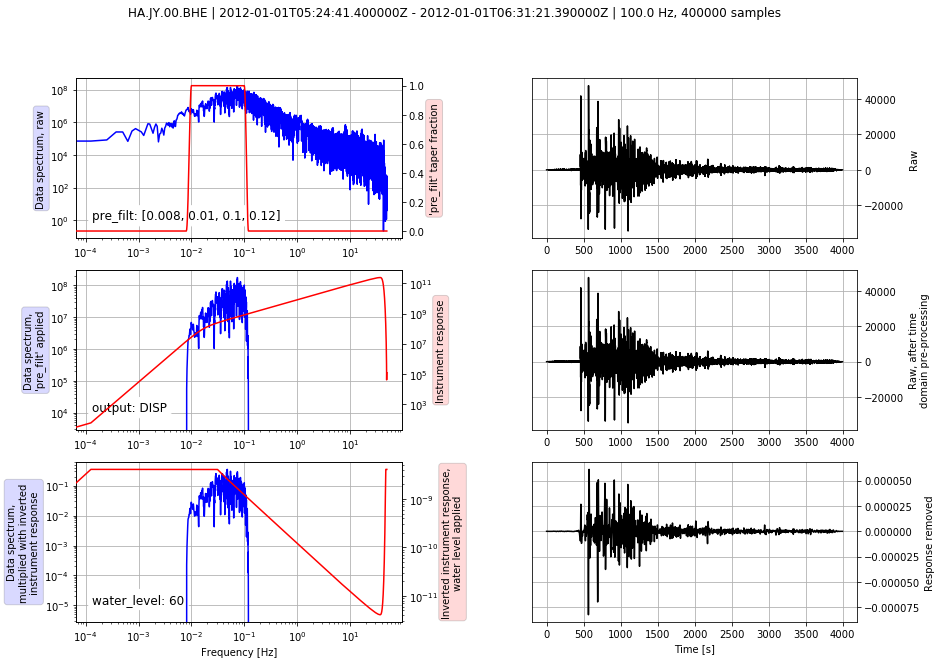

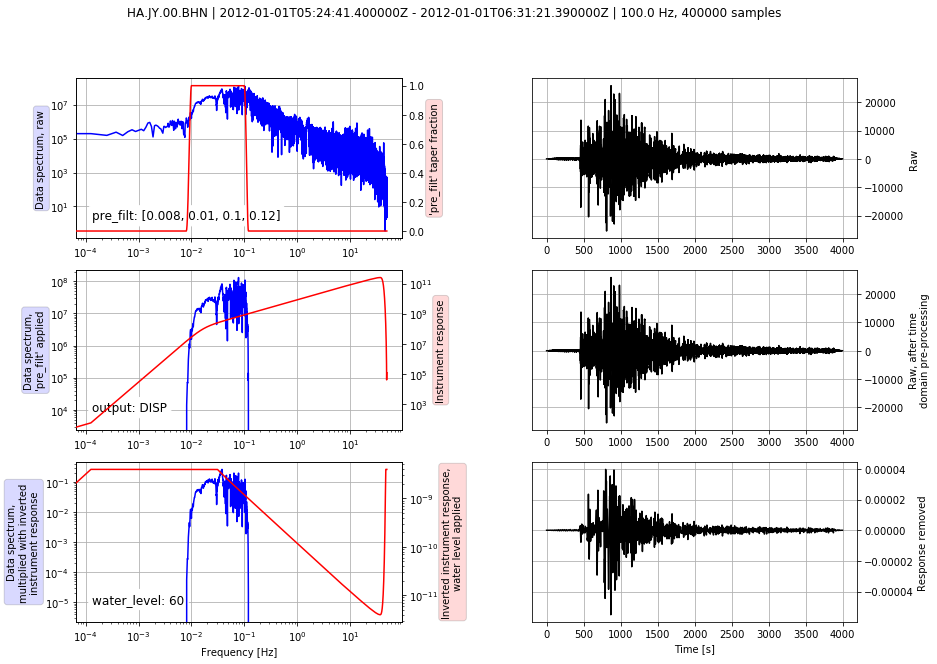

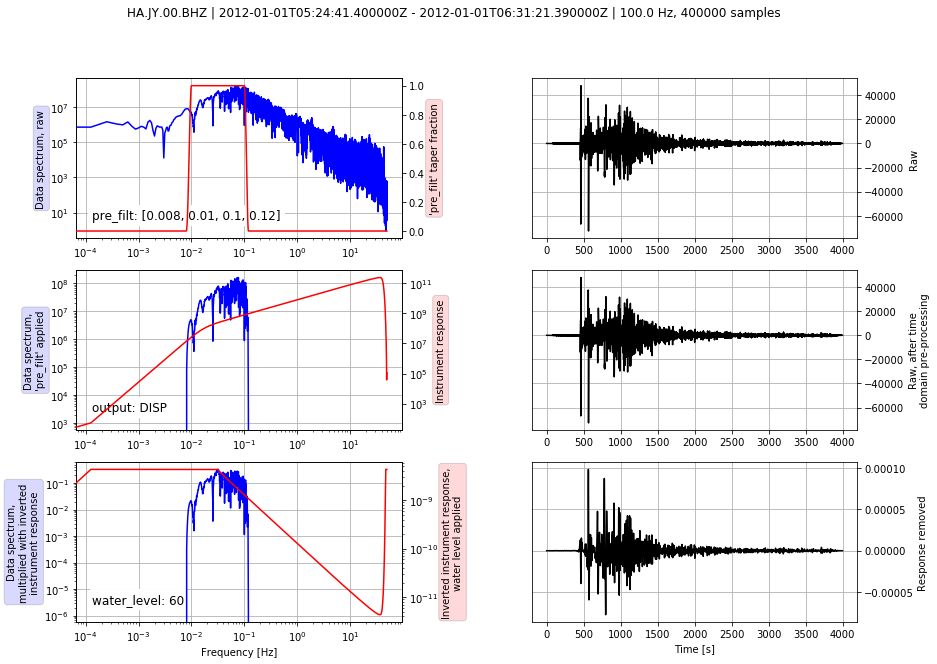

In [15]:
data=data_raw.copy()
pre_filt= (0.008,0.01,0.1,0.12)
data.remove_response(output="DISP", pre_filt=pre_filt, zero_mean=False,
                               taper=False, inventory=inv,plot=True)

3 Trace(s) in Stream:
HA.JY.00.BHE | 2012-01-01T05:24:41.400000Z - 2012-01-01T06:31:21.390000Z | 100.0 Hz, 400000 samples
HA.JY.00.BHN | 2012-01-01T05:24:41.400000Z - 2012-01-01T06:31:21.390000Z | 100.0 Hz, 400000 samples
HA.JY.00.BHZ | 2012-01-01T05:24:41.400000Z - 2012-01-01T06:31:21.390000Z | 100.0 Hz, 400000 samples

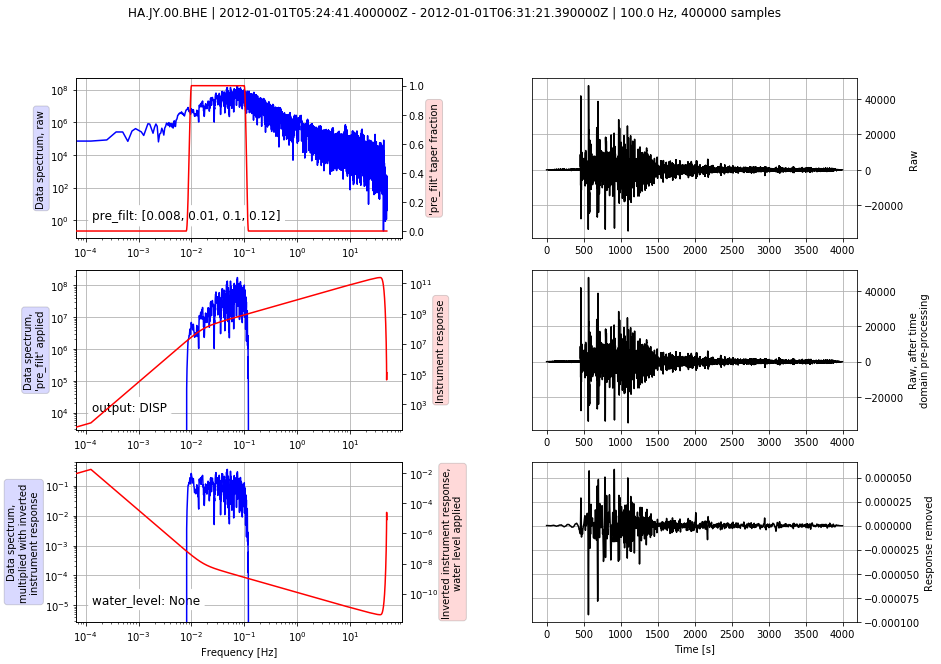

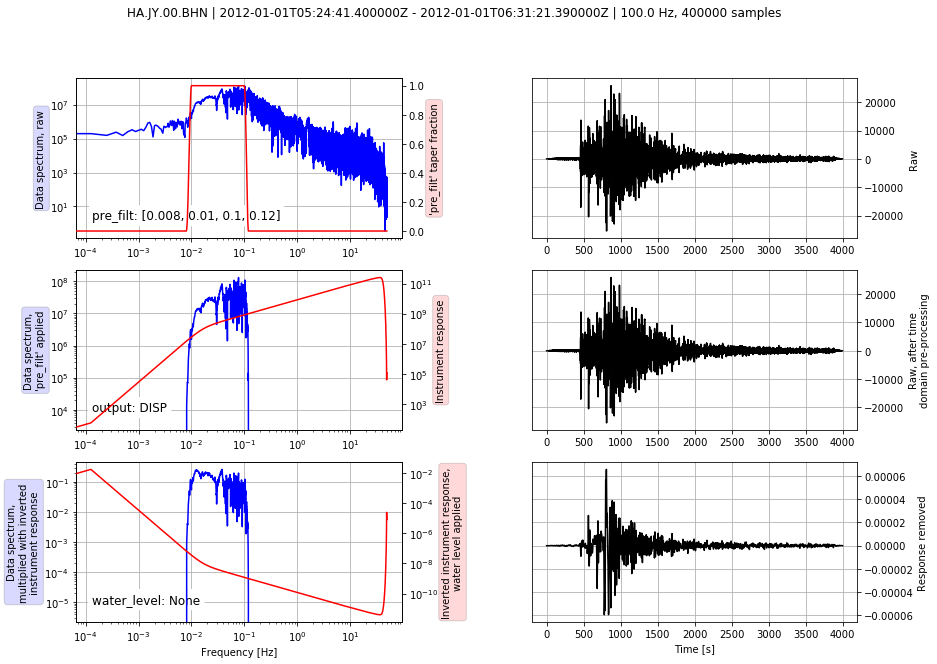

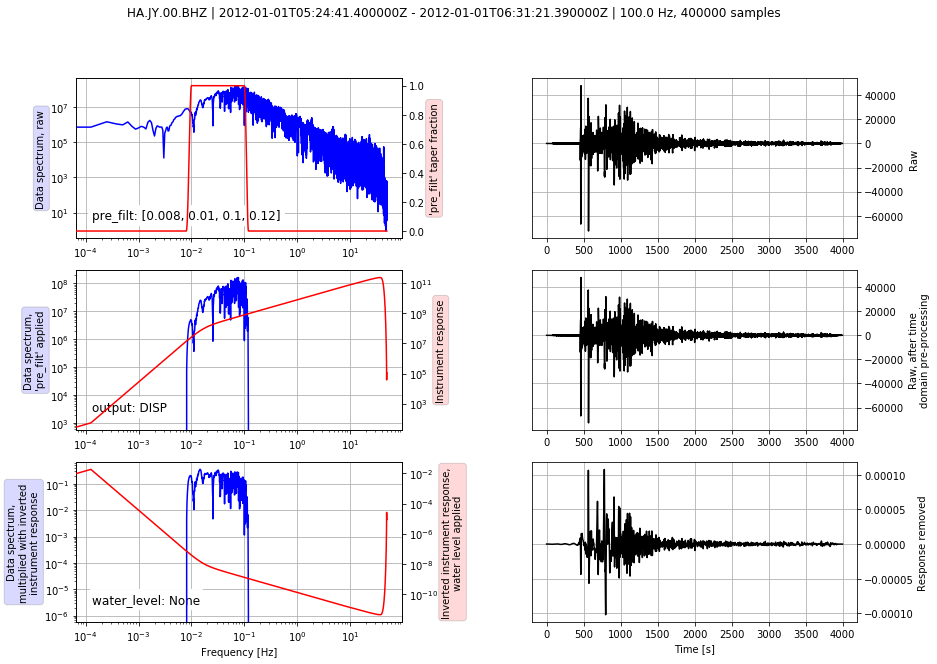

In [16]:
data=data_raw.copy()
pre_filt= (0.008,0.01,0.1,0.12)
data.remove_response(output="DISP", pre_filt=pre_filt, zero_mean=False,
                               taper=False, inventory=inv,plot=True,water_level=None)

# Compare the result from sac

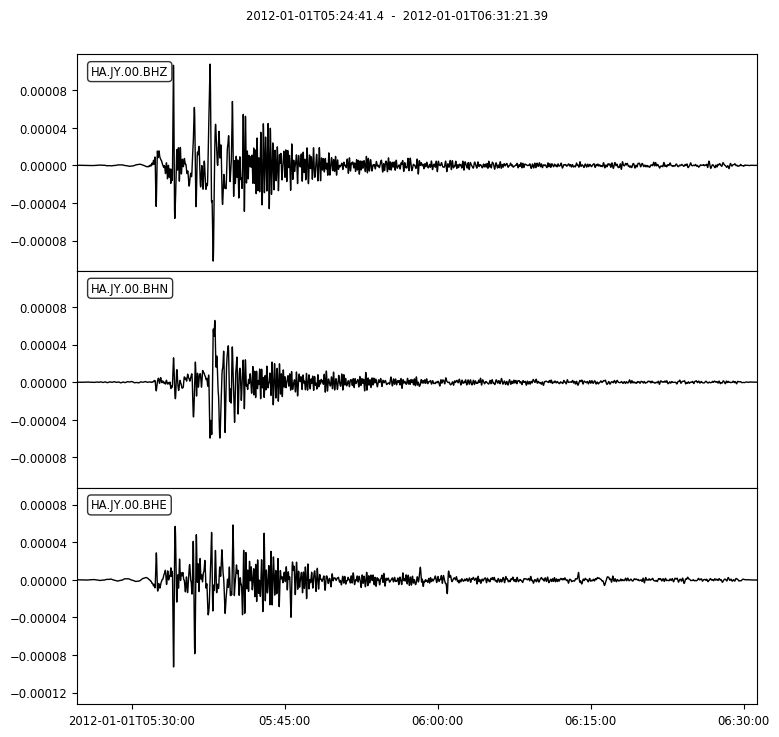

In [17]:
data.plot();

In [18]:
sacdata=obspy.read("./HA.JY/*sac")

In [21]:
for item in sacdata:
    item.data=item.data/10

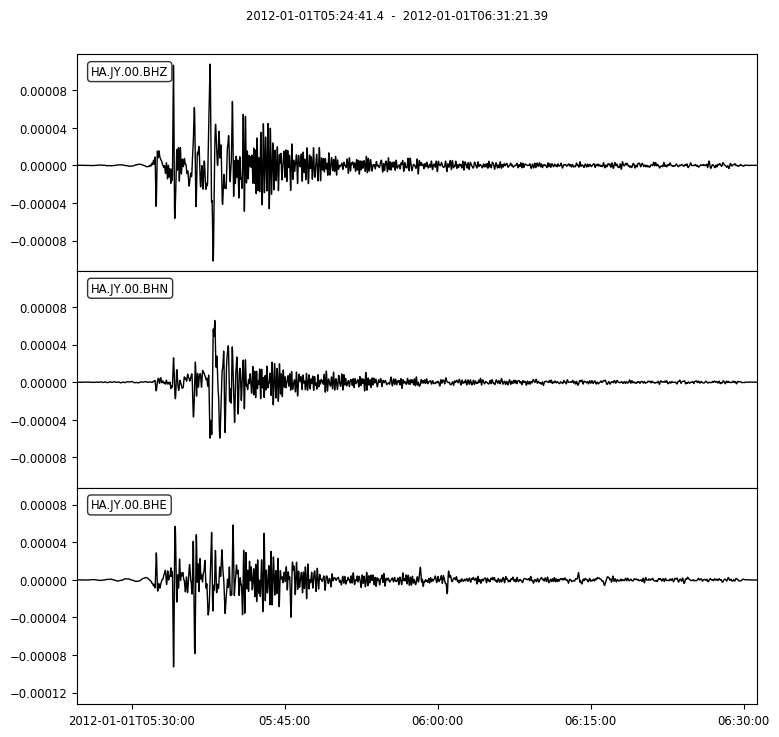

In [23]:
sacdata.plot();

In [24]:
diff=data[0].data-sacdata[0].data

In [25]:
diff

array([ -3.81948098e-09,  -3.81943691e-09,  -3.81939443e-09, ...,
         3.80352934e-09,   3.80085512e-09,   3.79819964e-09])

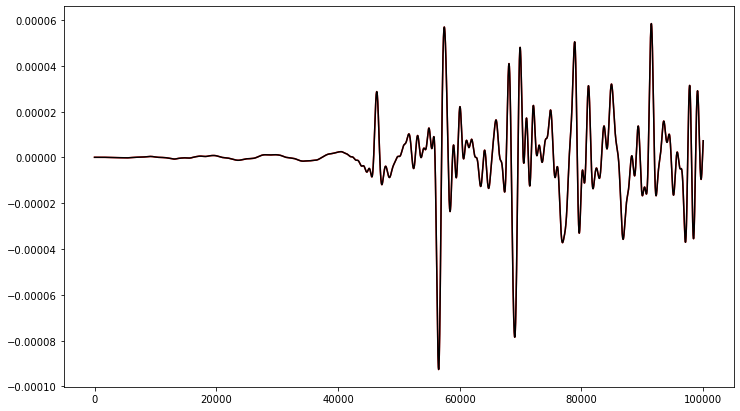

In [38]:
plt.figure(figsize=(12,7))
plt.plot(data[0].data[:100000],"r")
plt.plot(sacdata[0].data[:100000],"k")

In [29]:
import numpy as np
np.max(diff)

2.792322009568183e-08

In [30]:
per=diff/data[0].data

In [31]:
per

array([-0.06911928, -0.06908927, -0.06905933, ..., -0.03239729,
       -0.03239013, -0.03238315])

In [32]:
np.max(per)

574.86036915963291

In [33]:
np.argmax(per)

62712

In [35]:
diff[62712]

1.6860225040900566e-08

In [36]:
data[0].data[62712]

2.9329252711485237e-11

In [37]:
sacdata[0].data[62712]

-1.6830896e-08